In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression # it is used here because more advanced is not needed
from sklearn.ensemble import RandomForestClassifier # for better classification we use it

import warnings
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_csv("England 2 CSV.csv")
df.head(4)

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,15/01/2025,2024/25,Blackburn,Portsmouth,3,0,H,0.0,0.0,D,...,15.0,19.0,5.0,6.0,1.0,3.0,0.0,0.0,20250115,English Second
1,14/01/2025,2024/25,Cardiff,Watford,1,1,D,0.0,0.0,D,...,8.0,14.0,7.0,3.0,1.0,2.0,0.0,0.0,20250114,English Second
2,14/01/2025,2024/25,Plymouth,Oxford,1,1,D,0.0,1.0,A,...,8.0,10.0,6.0,3.0,1.0,1.0,0.0,0.0,20250114,English Second
3,6/01/2025,2024/25,QPR,Luton,2,1,H,1.0,1.0,D,...,10.0,9.0,3.0,4.0,1.0,1.0,0.0,0.0,20250106,English Second


In [30]:
df.shape

(11351, 25)

In [31]:
df.shape
df["FT Result"].value_counts()

FT Result
H    4926
A    3300
D    3125
Name: count, dtype: int64

In [32]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.sort_values("Date")

In [33]:
df.head(5)

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
11350,2004-08-07,2004/05,Wigan,Nott'm Forest,1,1,D,1.0,0.0,H,...,18.0,16.0,8.0,3.0,2.0,0.0,0.0,0.0,20040807,English Second
11340,2004-08-07,2004/05,Burnley,Sheffield United,1,1,D,1.0,0.0,H,...,12.0,17.0,5.0,5.0,1.0,0.0,0.0,0.0,20040807,English Second
11341,2004-08-07,2004/05,Coventry,Sunderland,2,0,H,0.0,0.0,D,...,16.0,8.0,6.0,4.0,1.0,1.0,0.0,0.0,20040807,English Second
11342,2004-08-07,2004/05,Crewe,Cardiff,2,2,D,1.0,1.0,D,...,14.0,12.0,3.0,6.0,0.0,1.0,0.0,0.0,20040807,English Second
11343,2004-08-07,2004/05,Ipswich,Gillingham,2,1,H,1.0,1.0,D,...,14.0,9.0,13.0,7.0,0.0,1.0,0.0,0.0,20040807,English Second


In [34]:
le = LabelEncoder()
df["Result"] = le.fit_transform(df["FT Result"])

# H = 2, D = 1, A = 0 (example mapping)

In [35]:
features = [
    "FTH Goals", "FTA Goals",
    "H Shots", "A Shots",
    "H SOT", "A SOT",
    "H Fouls", "A Fouls",
    "H Corners", "A Corners",
    "H Yellow", "A Yellow",
    "H Red", "A Red"
]

X = df[features]
y = df["Result"]

In [36]:
split = int(len(df) * 0.8)

X_train = X.iloc[:split]
X_test = X.iloc[split:]

y_train = y.iloc[:split]
y_test = y.iloc[split:]

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X.isnull().sum()

FTH Goals    0
FTA Goals    0
H Shots      1
A Shots      1
H SOT        1
A SOT        1
H Fouls      1
A Fouls      1
H Corners    1
A Corners    1
H Yellow     1
A Yellow     1
H Red        1
A Red        1
dtype: int64

In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

X_imputed = imputer.fit_transform(X)

In [40]:
X.isnull().sum()

FTH Goals    0
FTA Goals    0
H Shots      1
A Shots      1
H SOT        1
A SOT        1
H Fouls      1
A Fouls      1
H Corners    1
A Corners    1
H Yellow     1
A Yellow     1
H Red        1
A Red        1
dtype: int64

In [41]:
split = int(len(X_imputed) * 0.8)

X_train = X_imputed[:split]
X_test  = X_imputed[split:]

y_train = y.iloc[:split]
y_test  = y.iloc[split:]


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [45]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9977983267283135
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       703
           1       1.00      0.99      1.00       584
           2       1.00      1.00      1.00       984

    accuracy                           1.00      2271
   macro avg       1.00      1.00      1.00      2271
weighted avg       1.00      1.00      1.00      2271



In [47]:
import joblib

joblib.dump(rf, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

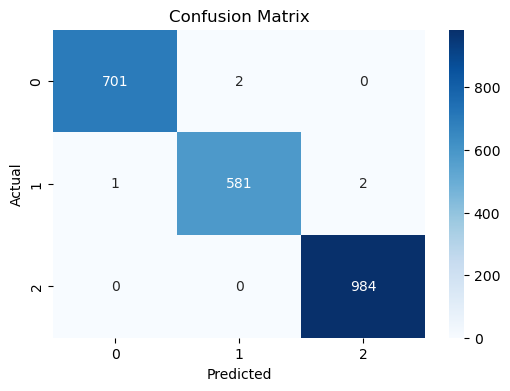

In [45]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

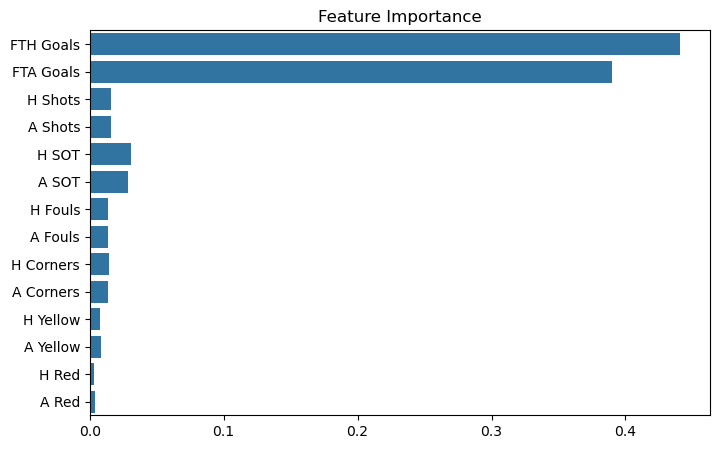

In [48]:
importances = rf.feature_importances_

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()